In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dataset["Species"] = lb.fit_transform(dataset["Species"])

In [7]:
dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [8]:
dataset.corr()["Species"]

Id               0.942830
SepalLengthCm    0.782561
SepalWidthCm    -0.419446
PetalLengthCm    0.949043
PetalWidthCm     0.956464
Species          1.000000
Name: Species, dtype: float64

In [9]:
dataset = dataset.drop("Id", axis=1)

<Figure size 1200x800 with 0 Axes>

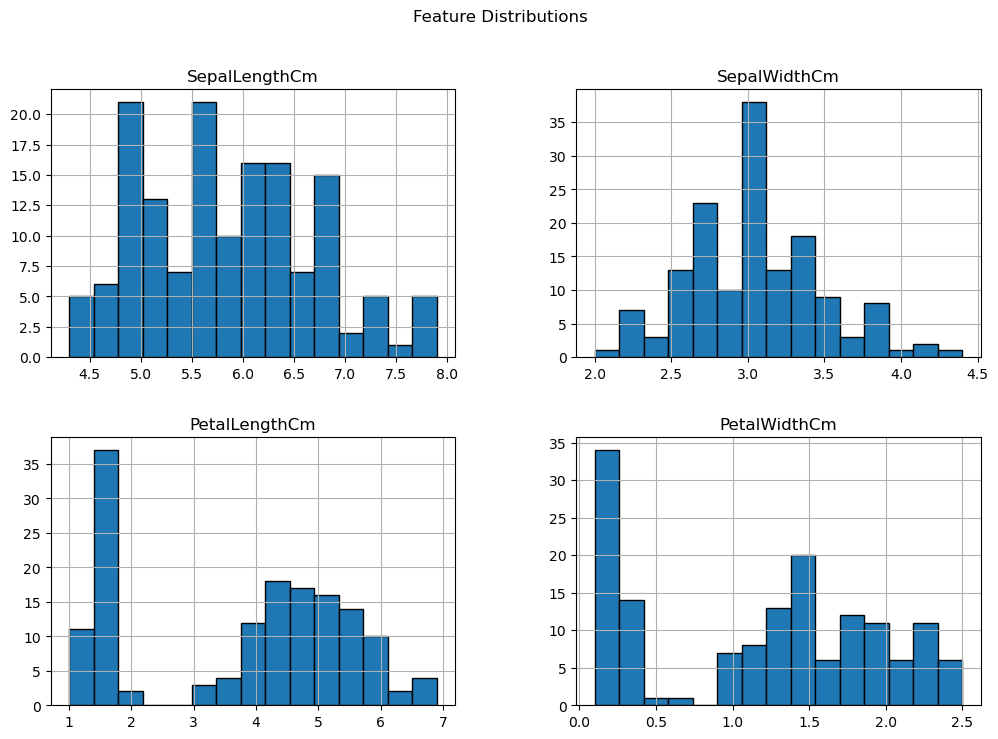

In [10]:
# ----- Distribution of Features -----
plt.figure(figsize=(12,8))
dataset.drop("Species", axis=1).hist(bins=15, edgecolor='black', figsize=(12,8))
plt.suptitle("Feature Distributions")
plt.show()

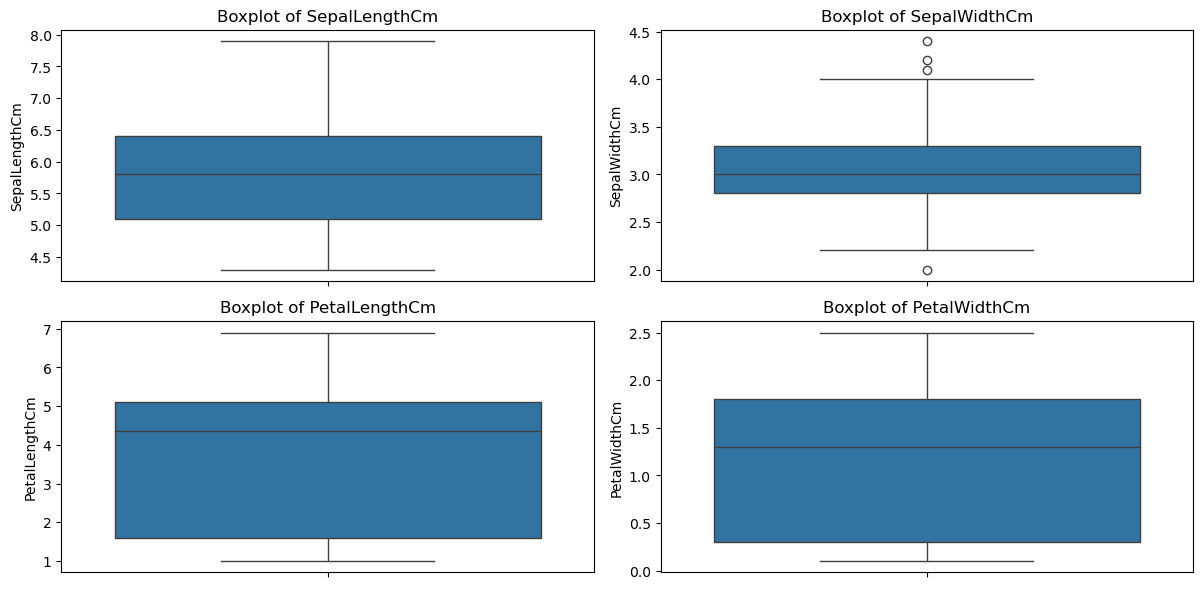

In [11]:
# ----- Boxplots to detect outliers -----
plt.figure(figsize=(12,6))
for i, column in enumerate(dataset.columns[:-1], 1):
    plt.subplot(2,2,i)
    sns.boxplot(y=dataset[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

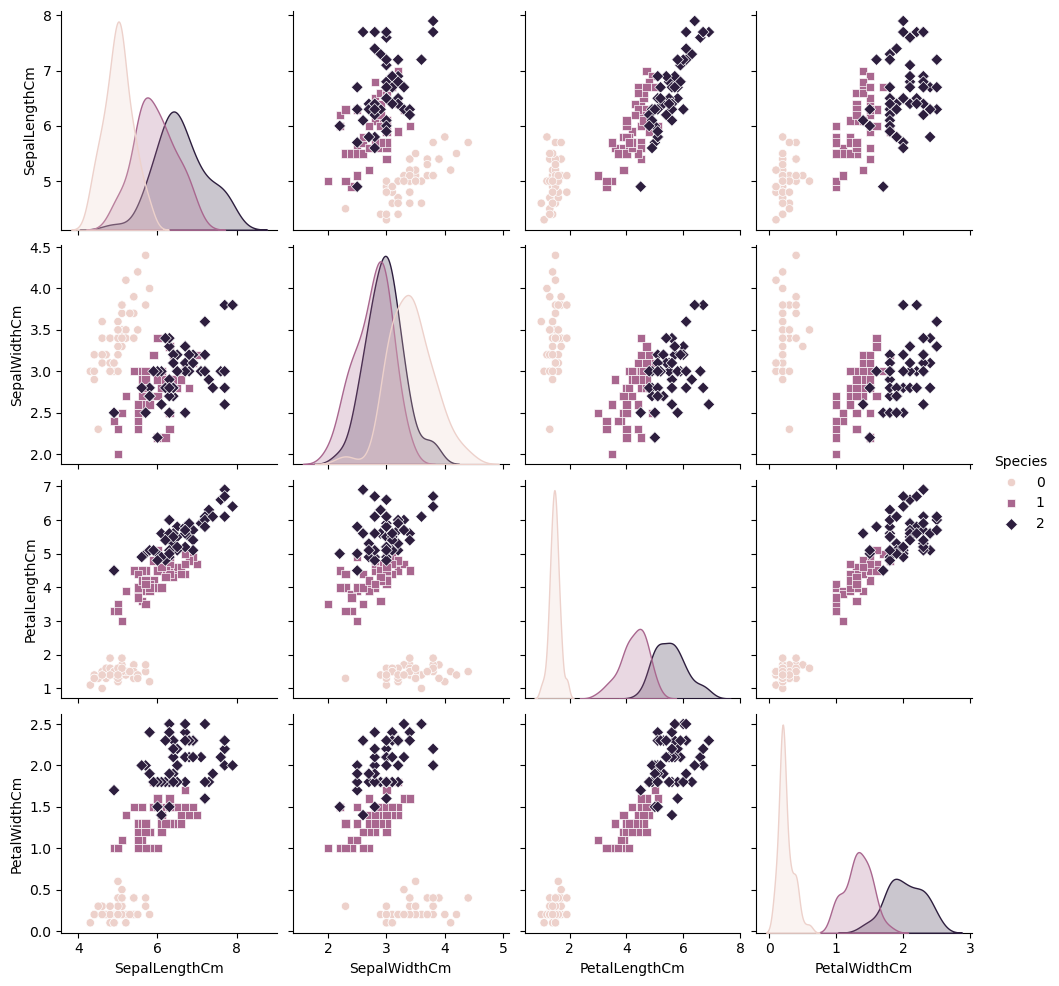

In [12]:
# ----- Pairplot to see feature relationships -----
sns.pairplot(dataset, hue="Species", markers=["o","s","D"])
plt.show()

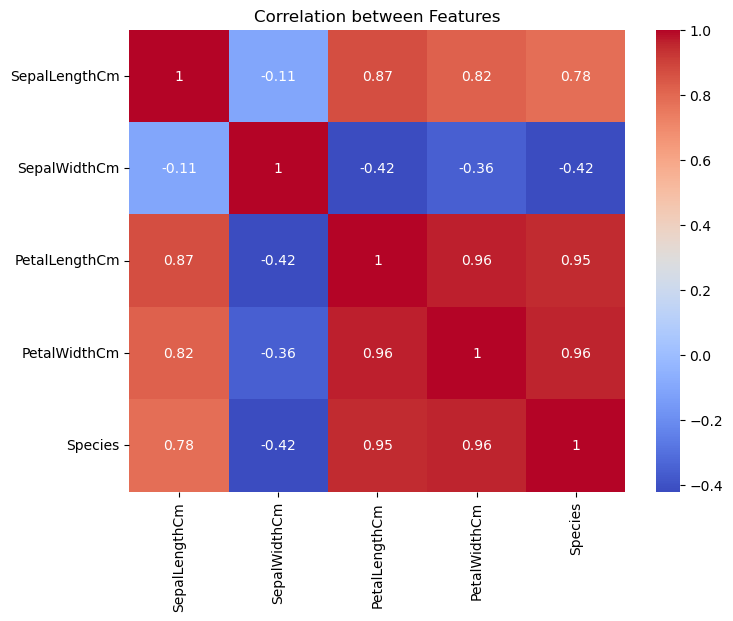

In [13]:
# ----- Correlation Heatmap -----
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Features")
plt.show()

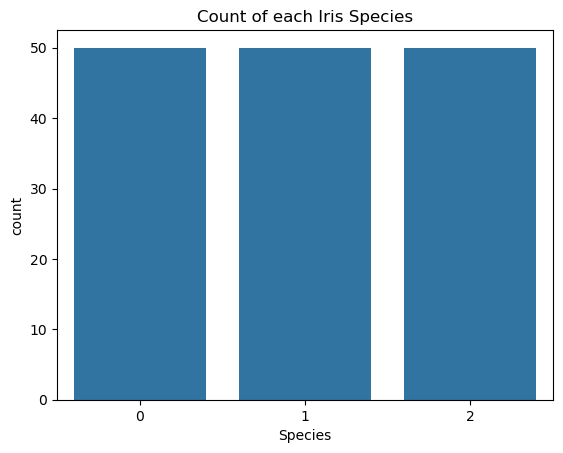

In [14]:
# ----- Count of each Species -----
sns.countplot(data=dataset, x="Species")
plt.title("Count of each Iris Species")
plt.show()

In [15]:
X = dataset.drop(["Species"], axis = 1)
y = dataset["Species"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = knn.predict(X_test_scaled)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [20]:
# Reset index of X_test and y_test to align properly
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

# Create a comparison DataFrame with all features + actual + predicted
comparison_all = X_test_reset.copy()  # Start with features
comparison_all['Actual_Yield'] = y_test_reset  # Add actual target
comparison_all['Predicted_Yield'] = y_pred     # Add predicted target

# Display the first 20 rows
print(comparison_all.head(20))


    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Actual_Yield  \
0             6.1           2.8            4.7           1.2             1   
1             5.7           3.8            1.7           0.3             0   
2             7.7           2.6            6.9           2.3             2   
3             6.0           2.9            4.5           1.5             1   
4             6.8           2.8            4.8           1.4             1   
5             5.4           3.4            1.5           0.4             0   
6             5.6           2.9            3.6           1.3             1   
7             6.9           3.1            5.1           2.3             2   
8             6.2           2.2            4.5           1.5             1   
9             5.8           2.7            3.9           1.2             1   
10            6.5           3.2            5.1           2.0             2   
11            4.8           3.0            1.4           0.1    

In [21]:
# Simple comparison DataFrame (Actual vs Predicted only)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

,Actual,Predicted
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


1.0

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



C:\Users\arbaz\AppData\Local\Temp\ipykernel_22344\418122388.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


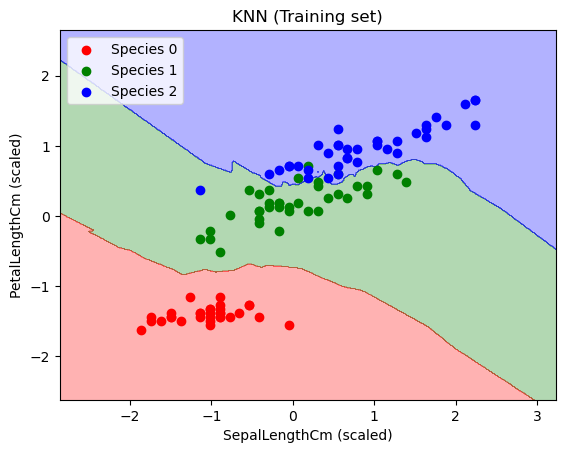

C:\Users\arbaz\AppData\Local\Temp\ipykernel_22344\418122388.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


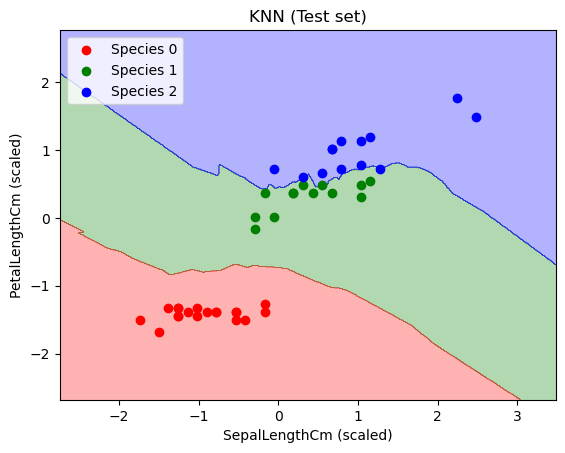

In [24]:
from matplotlib.colors import ListedColormap
import numpy as np

# Pick two features for visualization (SepalLengthCm vs PetalLengthCm)
X_vis_train = X_train_scaled[:, [0, 2]]  # Columns 0 = SepalLengthCm, 2 = PetalLengthCm
X_vis_test = X_test_scaled[:, [0, 2]]

# Train KNN again on 2 features
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_vis_train, y_train)

# Function to plot decision boundaries
def plot_decision_boundary(X_set, y_set, title):
    X1, X2 = np.meshgrid(
        np.arange(X_set[:,0].min()-1, X_set[:,0].max()+1, 0.01),
        np.arange(X_set[:,1].min()-1, X_set[:,1].max()+1, 0.01)
    )
    plt.contourf(
        X1, X2,
        knn_vis.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha=0.3,
        cmap=ListedColormap(('red','green','blue'))
    )
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
                    c=ListedColormap(('red','green','blue'))(i),
                    label=f'Species {j}')
    plt.title(title)
    plt.xlabel('SepalLengthCm (scaled)')
    plt.ylabel('PetalLengthCm (scaled)')
    plt.legend()
    plt.show()

# Plot training set
plot_decision_boundary(X_vis_train, y_train, "KNN (Training set)")

# Plot test set
plot_decision_boundary(X_vis_test, y_test, "KNN (Test set)")


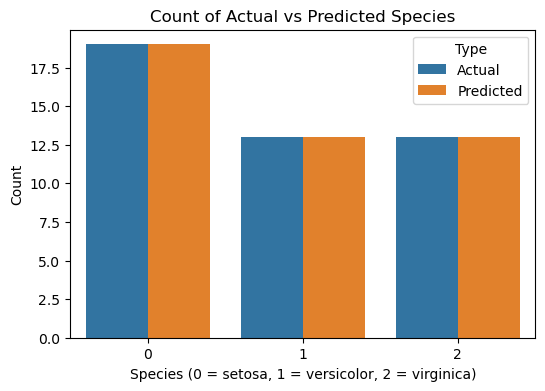

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create comparison DataFrame
comparison = pd.DataFrame({'Actual': y_test_reset, 'Predicted': y_pred}).reset_index(drop=True)

# Melt for plotting
comparison_melted = comparison.melt(var_name='Type', value_name='Species')

# Count plot
plt.figure(figsize=(6,4))
sns.countplot(data=comparison_melted, x='Species', hue='Type')
plt.title("Count of Actual vs Predicted Species")
plt.xlabel("Species (0 = setosa, 1 = versicolor, 2 = virginica)")
plt.ylabel("Count")
plt.show()
